**Obtaining and Cleaning the data**

In [134]:
from astropy.table import Table
import numpy as np

# Read in the table with some help from astropy
t = Table.read('vaneylen_radiusgap_v3_arxiv_lorrainecopy.tex')

In [135]:
# Take a look at the data
display(t)

# Store each column in an array
name_tab = t['Planet'] 
radius_planet_tab = t['R$_\mathrm{p}$ [R$_\oplus$]']
period_tab = t['Period [d]']
mass_star_tab = t['M$_\star$ [M$_\odot$]']
radius_star_tab = t['R$_\star$ [R$_\odot$]']

Planet,R$_\mathrm{p}$ [R$_\oplus$],Period [d],M$_\star$ [M$_\odot$],R$_\star$ [R$_\odot$]
str11,str17,str20,str25,str28
Kepler-10b,$1.473 \pm 0.026$,$0.83749026 (29)$,$0.920_{-0.020}^{+0.010}$,$1.0662_{-0.0075}^{+0.0069}$
Kepler-10c,$2.323 \pm 0.028$,$45.294292 (97)$,$0.920_{-0.020}^{+0.010}$,$1.0662_{-0.0075}^{+0.0069}$
Kepler-23b,$1.694 \pm 0.076$,$7.106995 (73)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-23c,$3.12 \pm 0.10$,$10.742434 (39)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-23d,$2.235 \pm 0.088$,$15.27429 (17)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-25b,$2.702 \pm 0.037$,$6.2385369 (33)$,$1.160_{-0.050}^{+0.040}$,$1.299_{-0.016}^{+0.015}$
...,...,...,...,...
Kepler-1274,$1.441 \pm 0.071$,$ 6.98156 (21)$,$1.38^{+0.07}_{-0.07}$,$2.16^{+0.04}_{-0.04}$
Kepler-1298,$1.588 \pm 0.089$,$ 7.12836 (47)$,$1.37^{+0.17}_{-0.17}$,$2.16^{+0.07}_{-0.07}$


In [136]:
name_tab.shape

(115,)

In [137]:
# Cleaning the data (whole table)
radius_p = []
period = []

i=0
while i < len(radius_planet_tab):
    r = radius_planet_tab[i].split()
    radius_p.append(float(r[0].strip('$')))

    p = period_tab[i].split()
    if p[0] == '$':
        period.append(float(p[1]))
    else:
        period.append(float(p[0].strip('$')))
    
    #print(i)
    
    i = i+1
    
radius_p = np.array(radius_p)
period = np.array(period);


In [138]:
# Figure things out one at a time
m = mass_star_tab[100].split()
mass_s = m[0].strip('$') #get rid of dollar signs

#mass_s[:6]

char = 0
while char < len(mass_s):
    if mass_s[char] == '_':
        mass_s = mass_s[:char]
        continue
    if mass_s[char] == '^':
        mass_s = mass_s[:char]
        continue
    
        
    char = char+1

float(mass_s)

1.22

In [139]:
radius_p.shape, period.shape

((115,), (115,))

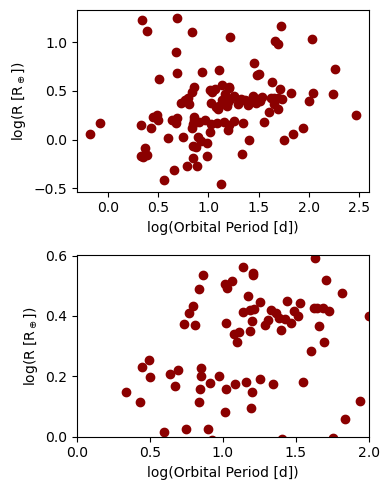

In [140]:
# Plotting the data

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(4,5))

ax1.scatter(np.log10(period), np.log10(radius_p), color='darkred')
ax1.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')


ax2.scatter(np.log10(period), np.log10(radius_p), color='darkred')
ax2.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
plt.xlim(np.log10(1),np.log10(100))
plt.ylim(np.log10(1),np.log10(4))

plt.tight_layout()
plt.savefig('plots/radiusValley.png')
plt.savefig('plots/radiusValley.pdf');

In [ ]:
# Need to label my data for supervised learning

The shape of the radius valley as predicted by Van Eylen et al. (2018) is this,

$$
\log_{10}(R_P) = -0.10\log_{10}(P)+0.38
$$

So, I will label my data based on this equation:

$
\log_{10}(R_P) > -0.10\log_{10}(P)+0.38
$ is a sub-Neptune.
$
\log_{10}(R_P) < -0.10\log_{10}(P)+0.38
$ is a super-Earth.

In [141]:
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
labels = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        labels.append(0) #0 -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        labels.append(1) #1 -> super-Earths
        
    i = i+1
    

labels;

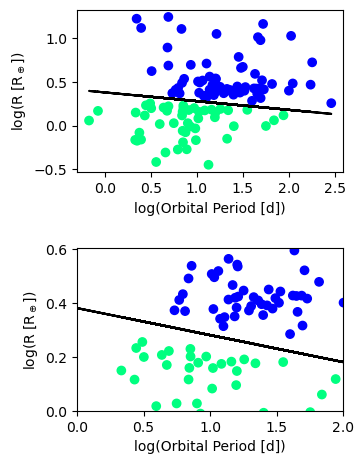

In [142]:
# Plotting labeled data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(4,5))

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a

ax1.scatter(np.log10(period), np.log10(radius_p), c=labels, cmap='winter')
ax1.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
ax1.plot(np.log10(period), boundary, color='black')

# Zoom-in
ax2.scatter(np.log10(period), np.log10(radius_p), c=labels, cmap='winter')
ax2.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
ax2.plot(np.log10(period), boundary, color='black')
plt.xlim(np.log10(1),np.log10(100))
plt.ylim(np.log10(1),np.log10(4))


plt.tight_layout(pad=2)
plt.savefig('plots/svm.pdf')
plt.savefig('plots/svm.png');

In [143]:
import warnings
warnings.filterwarnings("ignore")

**K-means Clustering**

Preparing the data:

In [179]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        y.append(1) # -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(0) # -> super-Earths
        
    i = i+1
    

y;

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X_scaled = StandardScaler().fit_transform(X)

# Split training and prediction
X_train, X_pred, y_train, y_pred = train_test_split(X_scaled,y, random_state=0)





In [181]:
X_train.shape, X_pred.shape

((86, 2), (29, 2))

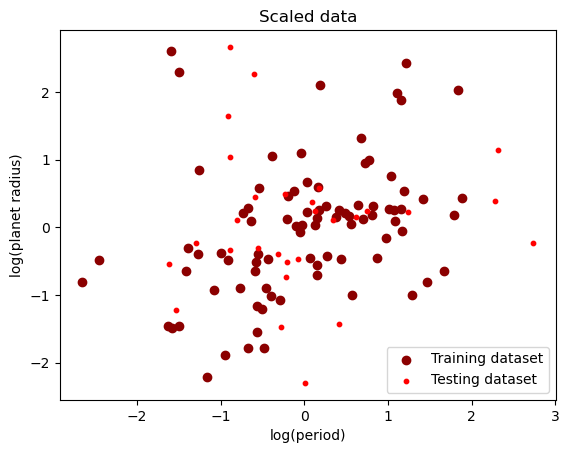

In [182]:
plt.scatter(X_train[:,0], X_train[:,1], color='darkred', label='Training dataset')
plt.scatter(X_pred[:,0], X_pred[:,1], s=10,color='red', label='Testing dataset')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Scaled data')
plt.legend()
plt.savefig('plots/train_test_split.pdf');

**K-means clustering:**

a) Build and fit the model,

In [183]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on the inertia
model = KMeans(n_clusters=2, n_init = 10, random_state=1)
# Fit the model
model.fit(X_train)
# Make prediction
labels = model.predict(X_train)
# Find the cluster centers/
centers = model.cluster_centers_


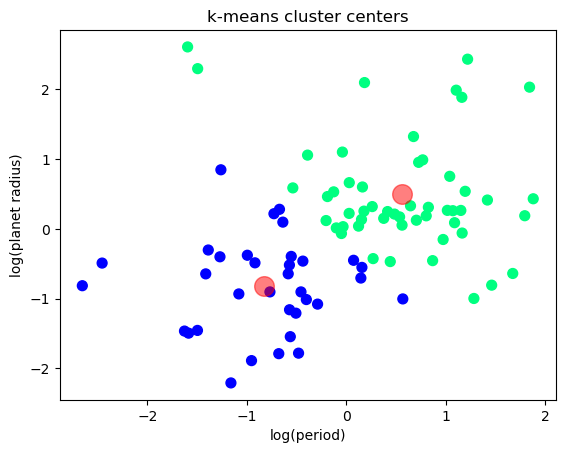

In [184]:
# Visualize cluster centers
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=50, cmap='winter')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means cluster centers')
plt.savefig('plots/kmeans_centers.pdf');


In [185]:
model.inertia_ #seems really high

91.13602488643636

b) Evaluate performance,

In [186]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels) #Training accuracy

0.8837209302325582

In [187]:
labels_pred = model.predict(X_pred)
accuracy_score(y_pred, labels_pred) #Testing accuracy

0.9655172413793104

c) Look into where things went wrong,

In [188]:
ind_wrong_train = np.where(y_train != labels)
ind_wrong_pred = np.where(y_pred != labels_pred)
ind_wrong_pred, ind_wrong_train

((array([21]),), (array([ 7, 15, 31, 37, 41, 58, 64, 68, 80, 82]),))

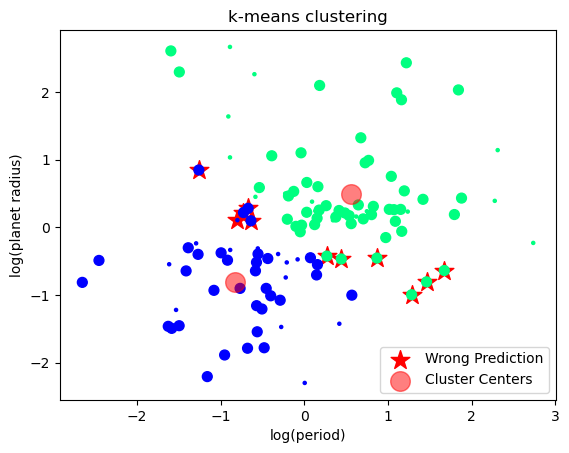

In [189]:
plt.scatter(X_pred[ind_wrong_pred,0], X_pred[ind_wrong_pred,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[ind_wrong_train,0], X_train[ind_wrong_train,1], marker='*', s=200, color='red')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=50, cmap='winter')
plt.scatter(X_pred[:,0], X_pred[:,1], c=labels_pred, s=5,cmap='winter')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, label='Cluster Centers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means clustering')
plt.legend();

d) Plot decision boundary,

In [190]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

#print(x_min, x_max, y_min, y_max)

# Make a 2D grid
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# Perform feature scaling
grid_scaled = StandardScaler().fit(X_train).transform(np.c_[xpts.ravel(), ypts.ravel()])

Z = model.predict(grid_scaled)
Z = Z.reshape(xpts.shape)

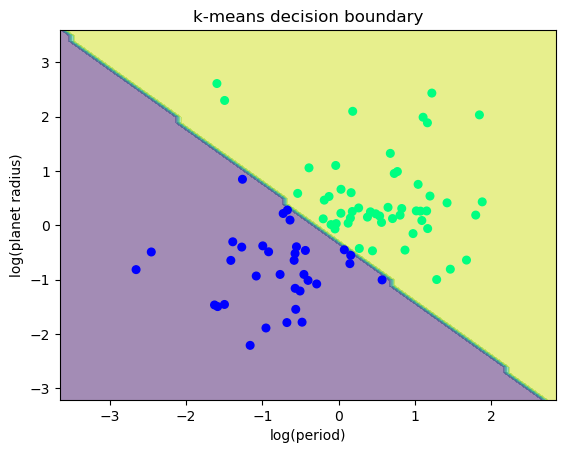

In [191]:
plt.contourf(xpts, ypts, Z, alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
#plot svm slope
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data

#play around to find the slope of rv determined by this method
new_line = -1.05*logp - 0.3

#plt.plot(logp,new_line, linestyle='--')
#plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means decision boundary');

In [192]:
labels = model.predict(X_scaled)
labels_kmeans = labels

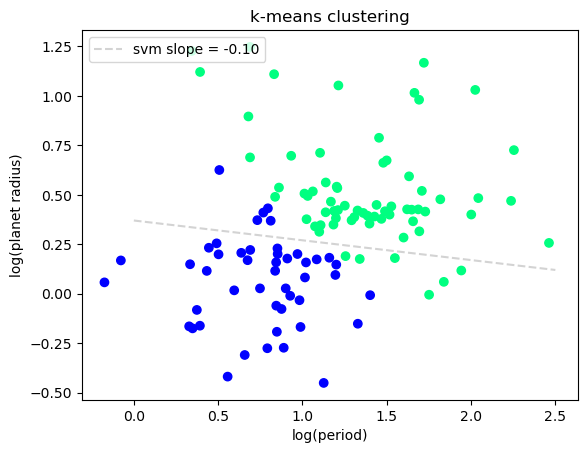

In [193]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')

#plot svm slope
logp = np.array([0,1,2,2.5])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
new_line = -1.05*logp + 1.4
#plt.plot(logp,new_line, linestyle='--', color='fuchsia', label='k-means slope = -1.05')
plt.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope = -0.10')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means clustering')
# plt.xlim(np.log10(1),np.log10(100))
# plt.ylim(np.log10(1),np.log10(4))
plt.legend(loc='upper left')
plt.savefig('plots/kmeans_clusters.png')
plt.savefig('plots/kmeans_clusters.pdf');




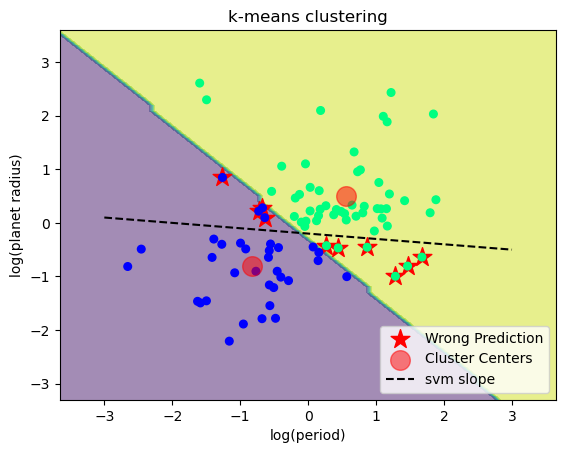

In [486]:
plt.contourf(xpts, ypts, Z, alpha=0.5)
plt.scatter(X_train[ind_wrong_train,0], X_train[ind_wrong_train,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5, label='Cluster Centers')
#plot svm slope
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means clustering')
plt.legend()

plt.savefig('plots/kmeans.pdf')
plt.savefig('plots/kmeans.png');


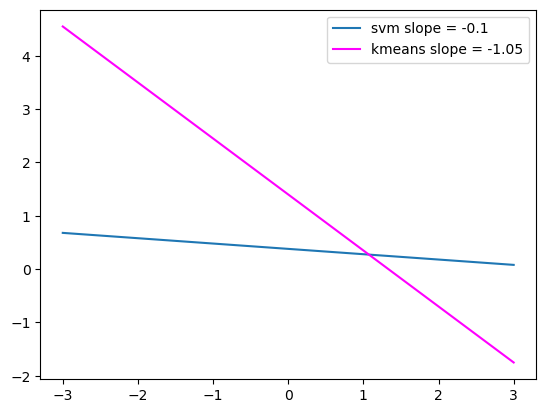

In [672]:
logp = np.array([-3,-2,-1,0,1,2,3])
m_svm = -0.10
m_kmeans = -1.05
logr = m_svm*logp + 0.38
kmeans = m_kmeans*logp + 1.4
#logr = StandardScaler(X).fit_transform(logr)
plt.plot(logp, logr, label='svm slope = '+str(m_svm))
plt.plot(logp, kmeans, color='fuchsia', label='kmeans slope = '+str(m_kmeans))
plt.legend();

The shape of the radius valley as predicted by Van Eylen et al. (2018) is this,

$$
\log_{10}(R_P) = -0.10\log_{10}(P)+0.38
$$

So, I will label my data based on this equation:

$
\log_{10}(R_P) > -0.10\log_{10}(P)+0.38
$ is a sub-Neptune.
$
\log_{10}(R_P) < -0.10\log_{10}(P)+0.38
$ is a super-Earth.

**Gaussian Mixture Model**

In [196]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
#     if log_radius_p[i] > boundary[i]:
#         y.append(2) # -> sub-Neptunes
#     if log_radius_p[i] < boundary[i]:
#         y.append(1) # -> super-Earths
    if log_radius_p[i] > boundary[i]:
        y.append(0) # -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(1) # -> super-Earths
        
    i = i+1
    

y;

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X_scaled = StandardScaler().fit_transform(X)

# Split training and prediction
X_train, X_pred, y_train, y_pred = train_test_split(X_scaled,y, random_state=0)

In [198]:
# The following functions are from workbook 7 (not written by me)
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    # score_samples tells you the "probability densities"
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1, label='Cluster centers')
    plt.legend()

a) Build and fit the model,

In [200]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2, n_init=10, random_state=0)
model.fit(X_train)
labels = model.predict(X_train) #hard clustering
probabilities = model.predict_proba(X_train) #soft clustering
#centers = model.means_ #cluster centers


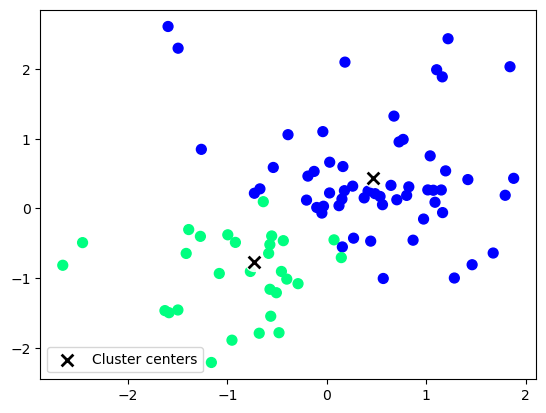

In [201]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=50, cmap='winter')
plot_centroids(model.means_, model.weights_)

b) Evaluate performance, 

In [202]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels) #Compare ground truth and predicted labels

0.8953488372093024

In [203]:
labels_p = model.predict(X_pred)
accuracy_score(y_pred, labels_p)

0.9310344827586207

c) Look into where things went wrong,

In [204]:
ind_wrong = np.where(y_pred != labels_p)
ind_wrong

(array([21, 28]),)

In [205]:
ind_wrong_train = np.where(y_train != labels)

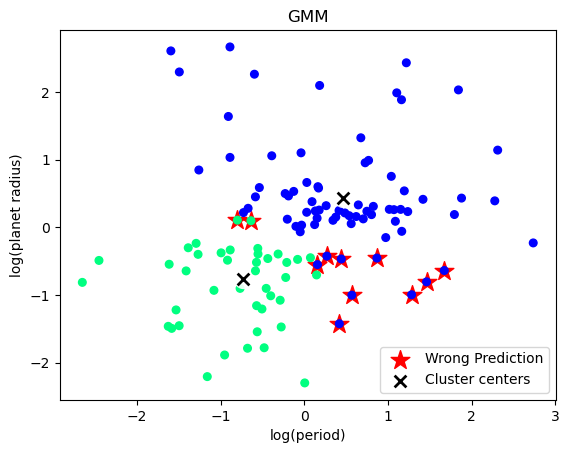

In [206]:
plt.scatter(X_pred[ind_wrong,0], X_pred[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[ind_wrong_train,0], X_train[ind_wrong_train,1], marker='*', s=200, color='red')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
plt.scatter(X_pred[:,0], X_pred[:,1], c=labels_p, s=30, cmap='winter')
plot_centroids(model.means_, model.weights_)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('GMM')
plt.legend()
plt.savefig('plots/gmm_appendix.pdf');

In [208]:
labels = model.predict(X_scaled)
labels_gmm = labels

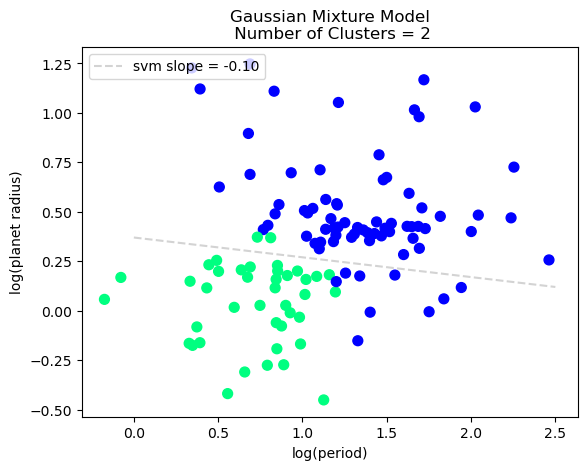

In [209]:
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='winter')
#plot svm slope
logp = np.array([0,1,2,2.5])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
plt.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope = -0.10')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Gaussian Mixture Model\n Number of Clusters = 2')
# plt.xlim(np.log10(1),np.log10(100))
# plt.ylim(np.log10(1),np.log10(4))
plt.legend(loc='upper left')
plt.savefig('plots/gmm_clusters.png')
plt.savefig('plots/gmm_clusters.pdf');


d) Plot decision boundary,

In [106]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#print(x_min, x_max, y_min, y_max)

# Make a 2D grid
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Perform feature scaling
grid_scaled = StandardScaler().fit(X).transform(np.c_[xpts.ravel(), ypts.ravel()])

Z = model.predict(grid_scaled)
Z = Z.reshape(xpts.shape)

In [107]:
labels = model.predict(X_train)

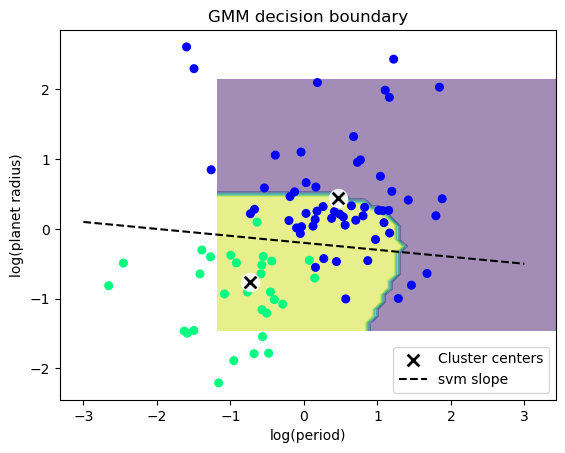

In [108]:
plt.contourf(xpts, ypts, Z, alpha=0.5)
#plt.scatter(X_scaled[ind_wrong,0], X_scaled[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
plot_centroids(model.means_, model.weights_)
#plot svm slope
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')


plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('GMM decision boundary')
plt.legend();

# plt.savefig('GMM_2clusters.pdf')
# plt.savefig('GMM_2clusters.png');

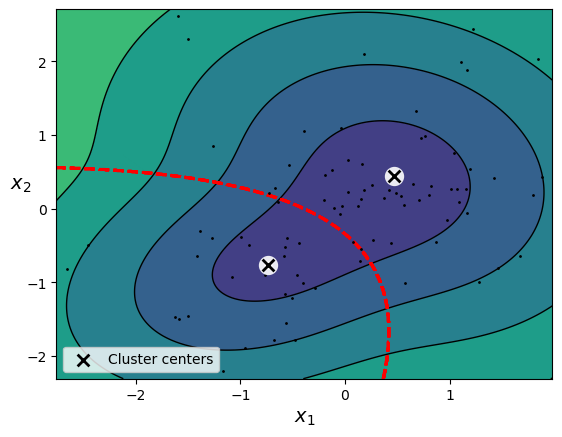

In [126]:
plot_gaussian_mixture(model,X_train)
plt.savefig('plots/gmm_decisionboundary.pdf')

**Gaussian Mixture Model pt 2**

In [80]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        y.append(1) # -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(2) # -> super-Earths

        
    i = i+1
    

y;

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X_scaled = StandardScaler().fit_transform(X)

# Split training and prediction
X_train, X_pred, y_train, y_pred = train_test_split(X_scaled,y, random_state=0)

a) Build and fit the model

In [82]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, n_init=10, random_state=0)
model.fit(X_train)
labels = model.predict(X_train) #hard clustering
probabilities = model.predict_proba(X_train) #soft clustering
#centers = model.means_ #cluster centers

In [83]:
labels

array([2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1])

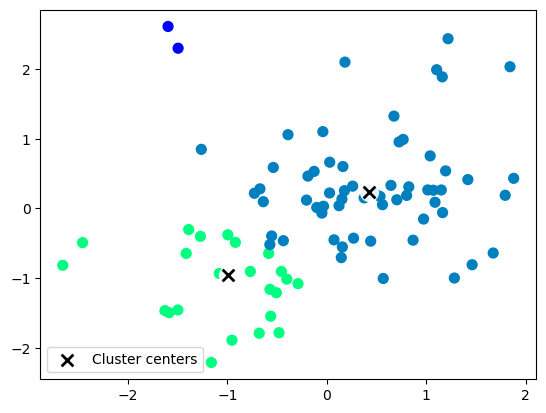

In [84]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=50, cmap='winter')
plot_centroids(model.means_, model.weights_)

b) Evaluate performance,

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, labels) #Compare ground truth and predicted labels

0.8255813953488372

In [86]:
labels_p = model.predict(X_pred)
accuracy_score(y_pred, labels_p)

0.7931034482758621

c) Look into where things went wrong,

In [87]:
ind_wrong = np.where(y_train != labels)
ind_wrong

(array([ 1,  2,  7, 22, 41, 45, 58, 59, 64, 68, 69, 71, 80, 83, 85]),)

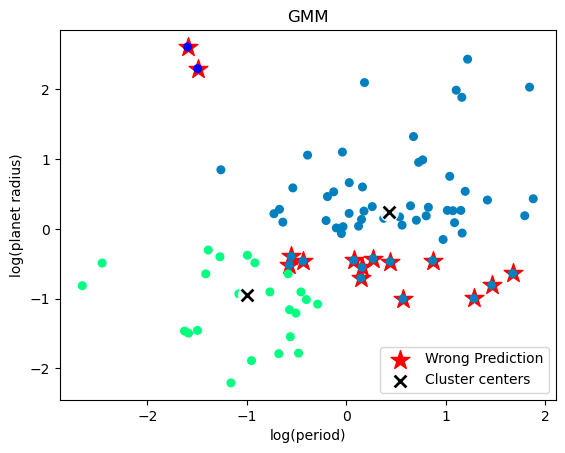

In [88]:
plt.scatter(X_train[ind_wrong,0], X_train[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
plot_centroids(model.means_, model.weights_)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('GMM')
plt.legend();

d) Plot decision boundary

In [89]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

#print(x_min, x_max, y_min, y_max)

# Make a 2D grid
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# Perform feature scaling
grid_scaled = StandardScaler().fit(X).transform(np.c_[xpts.ravel(), ypts.ravel()])

Z = model.predict(grid_scaled)
Z = Z.reshape(xpts.shape)

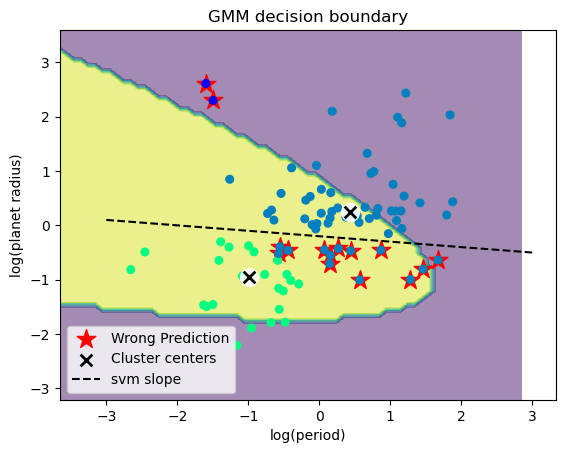

In [90]:
plt.contourf(xpts, ypts, Z, alpha=0.5)
plt.scatter(X_train[ind_wrong,0], X_train[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X_train[:,0], X_train[:,1], c=labels, s=30, cmap='winter')
plot_centroids(model.means_, model.weights_)
#plot svm slope
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')


plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('GMM decision boundary')
plt.legend()

plt.savefig('GMM_3clusters.pdf')
plt.savefig('GMM_3clusters.png');

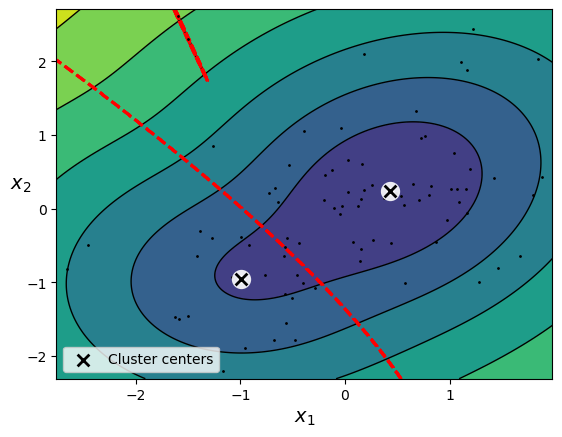

In [93]:
plot_gaussian_mixture(model,X_train)

#plot svm slope
# logp = np.array([-3,-2,-1,0,1,2,3])
# logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
# plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')



In [151]:
labels = model.predict(X_scaled)

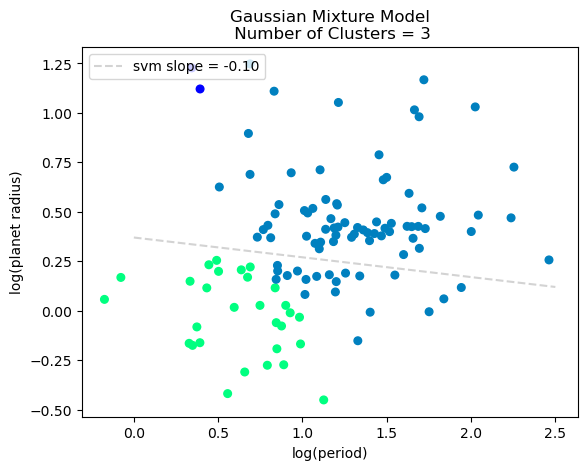

In [153]:
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='winter')
#plot svm slope
logp = np.array([0,1,2,2.5])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
plt.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope = -0.10')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Gaussian Mixture Model\n Number of Clusters = 3')
# plt.xlim(np.log10(1),np.log10(100))
# plt.ylim(np.log10(1),np.log10(4))
plt.legend(loc='upper left')
plt.savefig('plots/gmm_3clusters.png')
plt.savefig('plots/gmm_3clusters.pdf');


**DBSCAN**

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X_scaled = StandardScaler().fit_transform(X)

# Split training and prediction
X_train, X_pred = train_test_split(X_scaled, random_state=0)

In [217]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        y.append(0) # -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(1) # -> super-Earths

        
    i = i+1
    

y;

In [218]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1 #-1 is label of noise data points
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="winter")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.5)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

a) Build and fit the model,

In [219]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=5)
model.fit(X_scaled)
#labels = model.predict(X)

DBSCAN(eps=0.4)

In [220]:
labels_dbscan = model.labels_

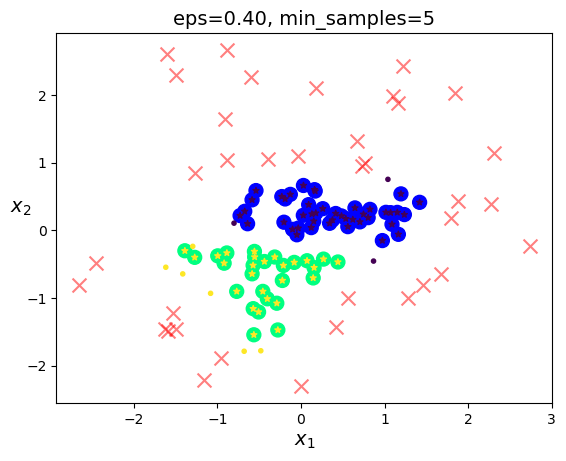

In [221]:
plot_dbscan(model, X_scaled, size=100)
plt.savefig('plots/DBSCAN.pdf');

In [222]:
len(np.unique(model.labels_)) # number of clusters identified including noise


3

b) Evaluate performance

In [223]:
from sklearn.metrics import accuracy_score

accuracy_score(y, model.labels_) #Compare ground truth and predicted labels

0.6782608695652174

c) Look into where things went wrong

In [224]:
ind_wrong = np.where(y != model.labels_)
ind_wrong

(array([  0,   6,   7,   8,  20,  22,  27,  32,  39,  45,  46,  52,  53,
         59,  62,  64,  65,  66,  67,  70,  71,  73,  74,  80,  87,  88,
         89,  90,  94,  95,  96,  97,  99, 103, 105, 111, 114]),)

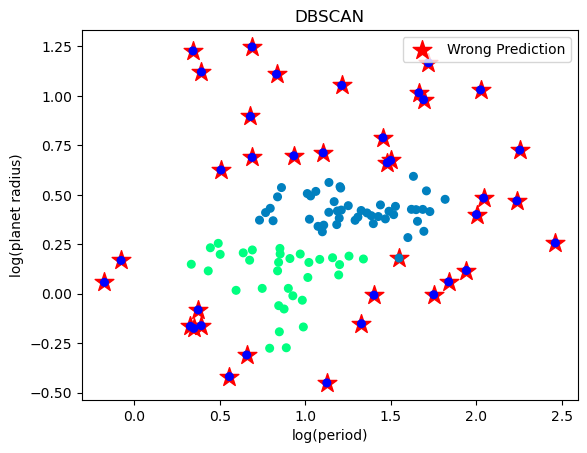

In [225]:
plt.scatter(X[ind_wrong,0], X[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=30, cmap='winter')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('DBSCAN')
plt.legend();

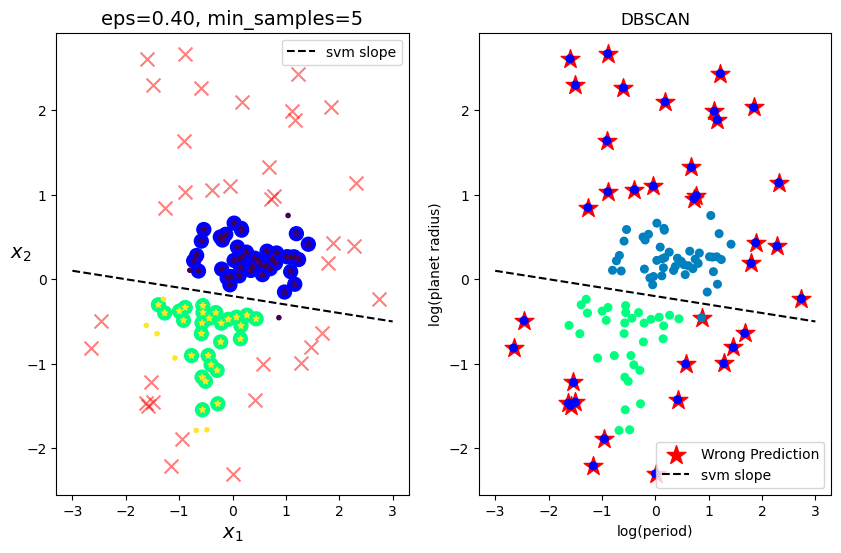

In [171]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plot_dbscan(model, X, size=100)
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X[ind_wrong,0], X[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=30, cmap='winter')
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('DBSCAN')
plt.legend()

plt.savefig('plots/DBSCAN.pdf')
plt.savefig('plots/DBSCAN.png');

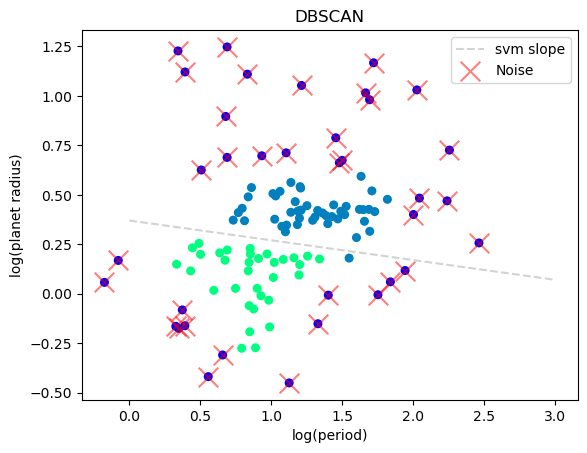

In [208]:
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=30, cmap='winter')
# SVM slope
logp = np.array([0,1,2,3])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='lightgrey', linestyle='--', label='svm slope')
# Plot X's on the data points classified as noise
anomalies_mask = model.labels_ == -1 #-1 is label of noise data points
anomalies = X[anomalies_mask]
plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=200, alpha=0.5, label='Noise')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.title('DBSCAN')
plt.savefig('plots/dbscan_clusters.png')
plt.savefig('plots/dbscan_clusters.pdf');




d) Plot decision boundary

In [348]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#print(x_min, x_max, y_min, y_max)

# Make a 2D grid
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# Perform feature scaling
grid_scaled = StandardScaler().fit(X).transform(np.c_[xpts.ravel(), ypts.ravel()])

# Z = model.predict(grid_scaled)
# Z = Z.reshape(xpts.shape)

In [360]:
from sklearn.metrics import pairwise_distances 
import numpy as np 
def predict_cluster(dbscan, X_new, metric): 
    """ Predicts the cluster label for new samples using a trained DBSCAN model. 
    Parameters: 
    dbscan: trained DBSCAN model 
    X_new: array of new samples, 
    metric: the distance criteria used same as used for training the DBSCAN
    shape (n_samples, n_features)
    Returns: array of predicted cluster labels, shape (n_samples,) 
    """ 
    # Calculate pairwise distances between new samples and all samples in the training set 
    distances = pairwise_distances(X_new, dbscan.components_, metric=metric) 
    # Find the index of the closest sample within eps distance 
    closest_sample_indices = np.argmin(distances, axis=1) 
    # Get the cluster labels of the closest samples 
    closest_sample_labels = dbscan.labels_[closest_sample_indices] 
    return closest_sample_labels

Z = predict_cluster(model, grid_scaled, 'euclidean')
Z = Z.reshape(xpts.shape)

# test_set = test.copy()
# # You can use this function to predict the cluster label of new samples like this-
# test_set['cluster'] = predict_cluster(dbscan, test, 'euclidean')
# test_set['cluster'].value_counts()



In [361]:
Z.shape

(70, 74)

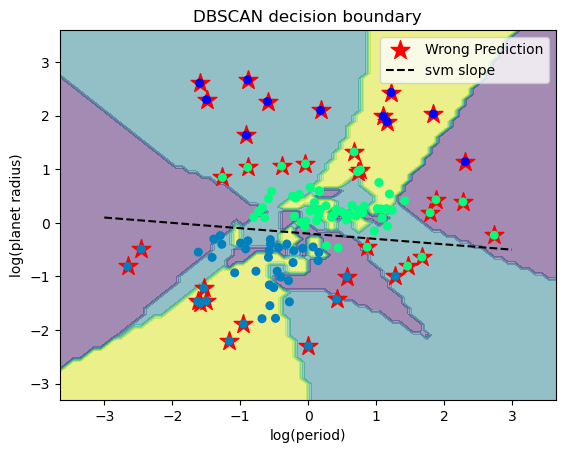

In [364]:
plt.contourf(xpts, ypts, Z, alpha=0.5)
plt.scatter(X[ind_wrong,0], X[ind_wrong,1], marker='*', s=200, color='red', label='Wrong Prediction')
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='winter')
#plot_centroids(model.means_, model.weights_)
#plot svm slope
logp = np.array([-3,-2,-1,0,1,2,3])
logr = -0.10*logp -0.2 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')


plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('DBSCAN decision boundary')
plt.legend()

**Now try to do the same thing but with Bagging**

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X = StandardScaler().fit_transform(X)


In [154]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        y.append(0) #0 -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(1) #1 -> super-Earths
        
    i = i+1
    

y;

In [155]:
# Split training and prediction
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [156]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on the inertia
model = KMeans(n_clusters=2, n_init = 10)
# Fit the model
model.fit(X)
# Make prediction
labels = model.predict(X)
# Find the cluster centers
centers = model.cluster_centers_

In [160]:
# Bagging
from sklearn.ensemble import BaggingClassifier

# Split training and prediction
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
bag_clf = BaggingClassifier(model, n_estimators=1000, 
                            max_samples=1.0, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)
labels = bag_clf.predict(X)



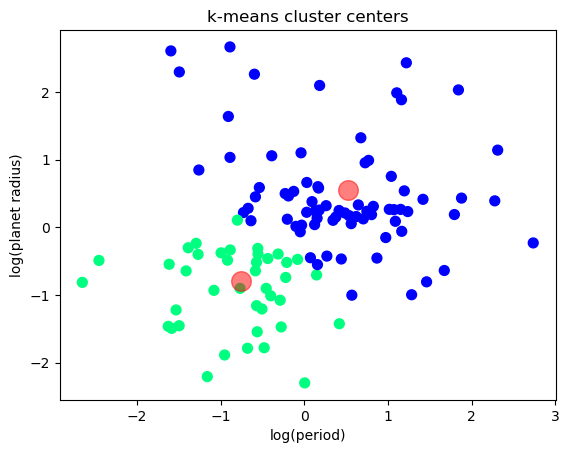

In [161]:
# Visualize cluster centers
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='winter')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('k-means cluster centers');

**Random Forest**

In [230]:
# Label the data so I can evaluate performance later
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
y = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        y.append(0) # -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        y.append(1) # -> super-Earths

        
    i = i+1
    

y;

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Put features into array
log_period = np.log10(period)
log_radius_p = np.log10(radius_p)
X = np.array([log_period, log_radius_p]).T
feature_names = ['log(period)', 'log(planet radius)']

# Perform preprocessing
X_scaled = StandardScaler().fit_transform(X)

# Split training and prediction
X_train, X_pred, y_train, y_pred = train_test_split(X_scaled,y, random_state=0)

In [232]:
def plot_decision_boundary(model, X, y, alpha=0.5, contour=True, marker=None):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    if contour:
        plt.contourf(XX, YY, Z, alpha=alpha, cmap='bwr')
    
    if marker == None:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr', marker=marker)
        
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')


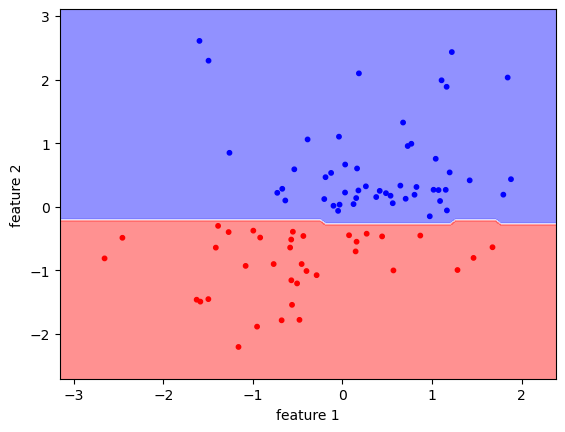

In [233]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=2) #oob_score -> out-of-bag score
model.fit(X_train, y_train)
labels = model.predict(X_scaled)

plot_decision_boundary(model, X_train, y_train)


In [234]:
labels_rf = labels

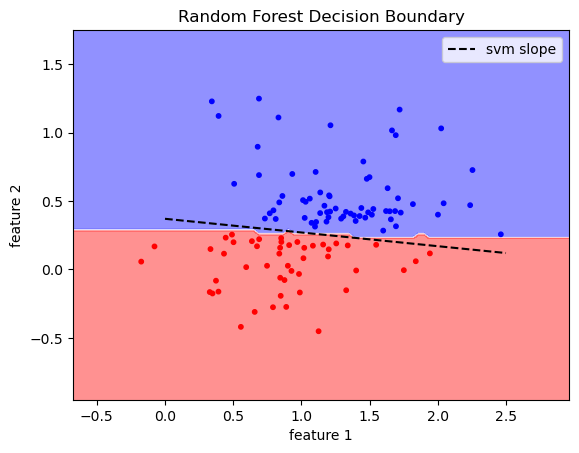

In [249]:
plot_decision_boundary(model, X, y)
logp = np.array([0,1,2,2.5])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='black', linestyle='--', label='svm slope')
plt.legend()
plt.title('Random Forest Decision Boundary')
plt.savefig('plots/rf_decisionBoundary.png')
plt.savefig('plots/rf_decisionBoundary.pdf');


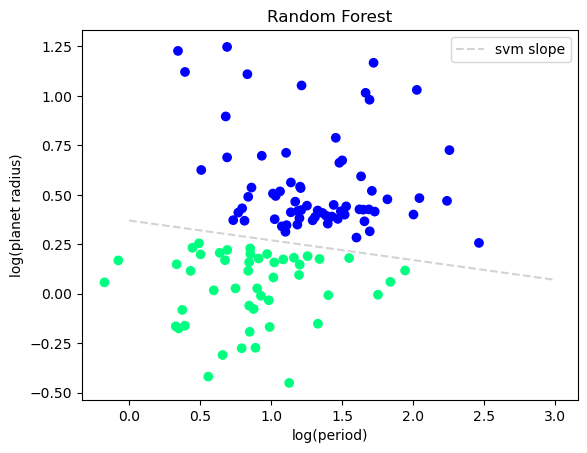

In [237]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
# SVM slope
logp = np.array([0,1,2,3])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
plt.plot(logp, logr, color='lightgrey', linestyle='--', label='svm slope')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Random Forest')
plt.legend()
plt.savefig('plots/random_forest.png')
plt.savefig('plots/random_forest.pdf');

In [234]:
model.score(X_pred, y_pred)

1.0

In [235]:
model.score(X_train, y_train)

1.0

In [236]:
model.fit(X,y)
model.oob_score_

0.991304347826087

**Additional plots for write-up**

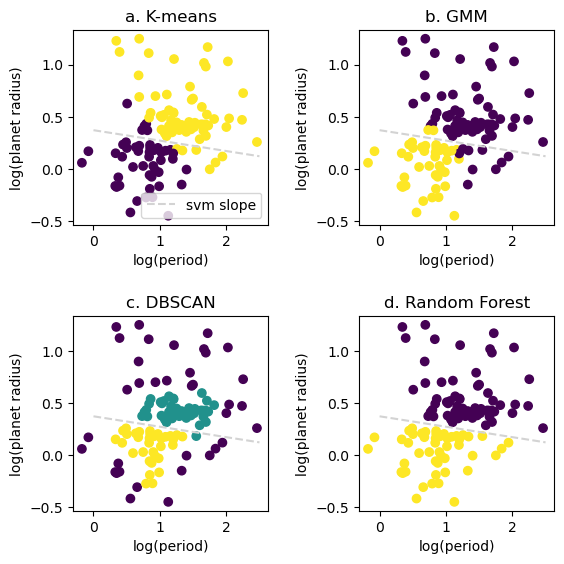

In [251]:
# SVM radius valley:
logp = np.array([0,1,2,2.5])
logr = -0.10*logp + 0.37 #svm equation scaled to scaled training data
new_line = -1.05*logp + 1.4

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(6,6))

ax1.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap='viridis')
ax1.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope')
ax1.set(xlabel=feature_names[0], ylabel=feature_names[1], title='a. K-means')
ax1.legend()

ax2.scatter(X[:,0], X[:,1], c=labels_gmm, cmap='viridis')
ax2.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope')
ax2.set(xlabel=feature_names[0], ylabel=feature_names[1], title='b. GMM')
#ax2.legend()

ax3.scatter(X[:,0], X[:,1], c=labels_dbscan, cmap='viridis')
ax3.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope')
ax3.set(xlabel=feature_names[0], ylabel=feature_names[1], title='c. DBSCAN')
#ax3.legend()

ax4.scatter(X[:,0], X[:,1], c=labels_rf, cmap='viridis')
ax4.plot(logp, logr, linestyle='--', color='lightgrey',label='svm slope')
ax4.set(xlabel=feature_names[0], ylabel=feature_names[1], title='d. Random Forest')
#ax4.legend()

plt.tight_layout(pad=2)
plt.savefig('plots/finalClusters.pdf')
plt.savefig('plots/finalClusters.png');


